In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

# Train and test on entire dataset

## LogisticRegression

In [3]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model using the default parameters
logreg = LogisticRegression()

logreg.fit(X, y)

logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# Store the predicted response values in variable
y_pred = logreg.predict(X)

# Print how many predictions were generated
print(len(y_pred))


150


### Checking the accuracy of the predictions

In [5]:
from sklearn import metrics

# Check the accuracy of the LogisticRegression prediction
print(metrics.accuracy_score(y, y_pred))

0.96


## KNN (K=5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


## KNN (K=1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

1.0


### Training and testing on the same dataset is not the reliable method

# Train/Test Split

In [8]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Spliting the dataset into two different ones - one for training and one for testing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [11]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [12]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


### Trying to predict the Iris species

## LogisticRegression

In [16]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.95


## KNN (K=5)

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


## KNN (K=1)

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.95


### KNeighbors Classifier with K=5 seems to be the most accurate
### Which value of K will be the best?

## The best value of K

In [22]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

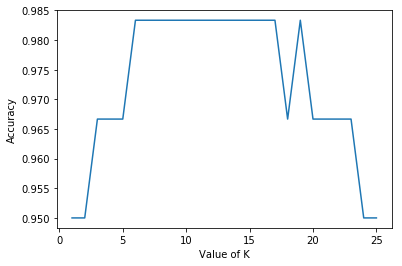

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

### The best value of K is from around 6 to 15.

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X, y)

knn.predict([[3, 5, 4, 2]])

array([1])